In [ ]:
import pandas as pd
import io
from google.colab import files
myfile = files.upload() 

Saving important.csv to important.csv


In [ ]:
df=pd.read_csv(io.BytesIO(myfile['important.csv']), encoding='euc-kr')

In [ ]:
df

,년도,이산화탄소 (ppm)
0,2000. 09,367.5
1,2000. 10,372.0
2,2000. 11,375.2
3,2000. 12,376.7
4,2001. 01,377.8
...,...,...
239,2020. 08,413.6
240,2020. 09,414.8
241,2020. 10,418.7
242,2020. 11,421.9


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null 
 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=10) 
fm._rebuild()
99
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic')

In [ ]:
from matplotlib import pyplot

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

ValueError: ignored

In [ ]:
# 컬럼명 변경
df.columns = ['ds', 'y']

# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

# 모델 생성
from fbprophet import Prophet
model = Prophet()

# 모델 학습
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# train set 마지막 1년 날짜 생성
last_year = list()
for i in range(1, 13):
    last_year.append(['2020-%02d' % i])
last_year = pd.DataFrame(last_year, columns = ['ds'])
last_year['ds']= pd.to_datetime(last_year['ds'])

In [ ]:
forecast = model.predict(last_year)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 2020-01-01  422.390991  421.917759  422.898363
1 2020-02-01  423.189899  422.668674  423.680065
2 2020-03-01  424.045066  423.549993  424.529804
3 2020-04-01  424.543323  424.049353  425.029765
4 2020-05-01  423.391694  422.948323  423.904302


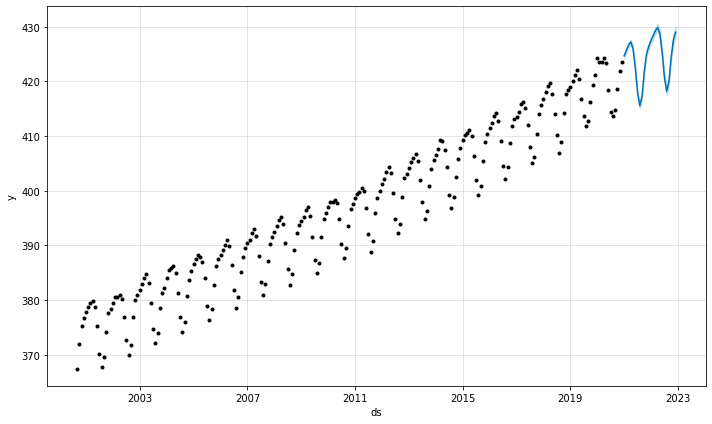

In [ ]:
model.plot(forecast)
pyplot.show()

In [ ]:
last_year = list()

for i in range(21, 99):
  for j in range(1, 13):
    last_year.append(['20%d-%02d' % (i, j)])

last_year = pd.DataFrame(last_year, columns = ['ds'])
last_year['ds']= pd.to_datetime(last_year['ds'])

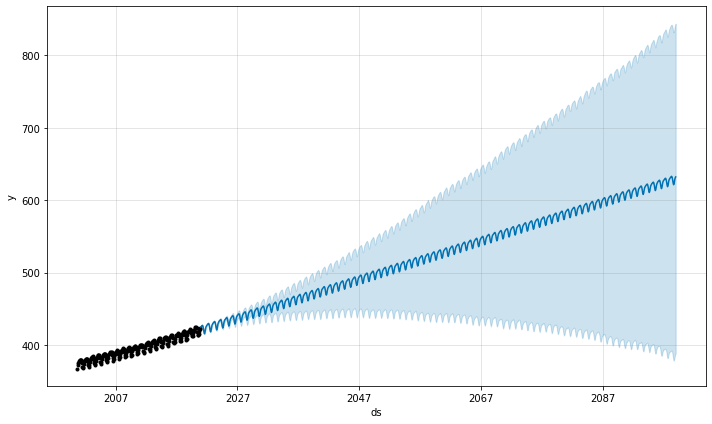

In [ ]:
forecast = model.predict(last_year)
model.plot(forecast)
pyplot.show()

In [ ]:
forecast.tail(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
11,2100-12-01,639.375831,293.239861,1024.325372,291.357342,1022.701747,1.847074,1.847074,1.847074,1.847074,1.847074,1.847074,0.0,0.0,0.0,641.222905


In [ ]:
# 마지막 12개월 제외시키기
train = df.drop(df.index[-12:])
y_true = df['y'][-12:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)

# train set 마지막 1년 날짜 생성
last_year = list()
for i in range(1, 13):
    last_year.append(['2100-%02d' % i])
last_year = pd.DataFrame(last_year, columns = ['ds'])
last_year['ds']= pd.to_datetime(last_year['ds'])

# 예측하고 비교하기
# 여기에서는 R2를 살펴본다.
forecast = model.predict(last_year)
y_pred = forecast['yhat'].values
from sklearn.metrics import r2_score
R2 = r2_score(y_true, y_pred)
print('R2: %.3f' % R2)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


R2: -2975.739
